# Anastasia Kolchina 191

## HSE Bioinformatics Elective 2021 - Homework №1

## Программная часть (код)

### Анализ пиков гистоновой метки

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

sns.set(style="darkgrid")

In [92]:
!wget https://github.com/netwasted/hse21_H2AFZ_ZDNA_human/raw/main/data/H2AFZ_brain.ENCFF271JBK.hg19.bed

--2021-11-07 07:31:45--  https://github.com/netwasted/hse21_H2AFZ_ZDNA_human/raw/main/data/H2AFZ_brain.ENCFF271JBK.hg19.bed
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/netwasted/hse21_H2AFZ_ZDNA_human/main/data/H2AFZ_brain.ENCFF271JBK.hg19.bed [following]
--2021-11-07 07:31:46--  https://raw.githubusercontent.com/netwasted/hse21_H2AFZ_ZDNA_human/main/data/H2AFZ_brain.ENCFF271JBK.hg19.bed
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5444417 (5.2M) [text/plain]
Saving to: ‘H2AFZ_brain.ENCFF271JBK.hg19.bed.1’

H2AFZ_brain.ENCFF27 100%[===================>]   5.19M  --.-KB/s    in 0.03s   

2

In [93]:
!wget https://github.com/netwasted/hse21_H2AFZ_ZDNA_human/raw/main/data/H2AFZ_brain.ENCFF534KJU.hg19.bed

--2021-11-07 07:31:46--  https://github.com/netwasted/hse21_H2AFZ_ZDNA_human/raw/main/data/H2AFZ_brain.ENCFF534KJU.hg19.bed
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/netwasted/hse21_H2AFZ_ZDNA_human/main/data/H2AFZ_brain.ENCFF534KJU.hg19.bed [following]
--2021-11-07 07:31:46--  https://raw.githubusercontent.com/netwasted/hse21_H2AFZ_ZDNA_human/main/data/H2AFZ_brain.ENCFF534KJU.hg19.bed
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4793310 (4.6M) [text/plain]
Saving to: ‘H2AFZ_brain.ENCFF534KJU.hg19.bed.1’

H2AFZ_brain.ENCFF53 100%[===================>]   4.57M  --.-KB/s    in 0.03s   

2

In [94]:
# mark1 = pd.read_csv('H2AFZ_brain.ENCFF271JBK.hg19.bed', sep='\t', comment='t', header=None)
mark1 = pd.read_csv('H2AFZ_brain.ENCFF271JBK.hg19.bed', sep='\t', header=None)
header = ['chrom', 'chromStart', 'chromEnd', 'name', 'score']
mark1.columns = header[:len(mark1.columns)]

In [95]:
mark1['chromLen'] = mark1['chromEnd'] - mark1['chromStart']

In [96]:
# mark2 = pd.read_csv('H2AFZ_brain.ENCFF534KJU.hg19.bed', sep='\t', comment='t', header=None)
mark2 = pd.read_csv('H2AFZ_brain.ENCFF534KJU.hg19.bed', sep='\t', header=None)
header = ['chrom', 'chromStart', 'chromEnd', 'name', 'score']
mark2.columns = header[:len(mark2.columns)]

In [97]:
mark2['chromLen'] = mark2['chromEnd'] - mark2['chromStart']

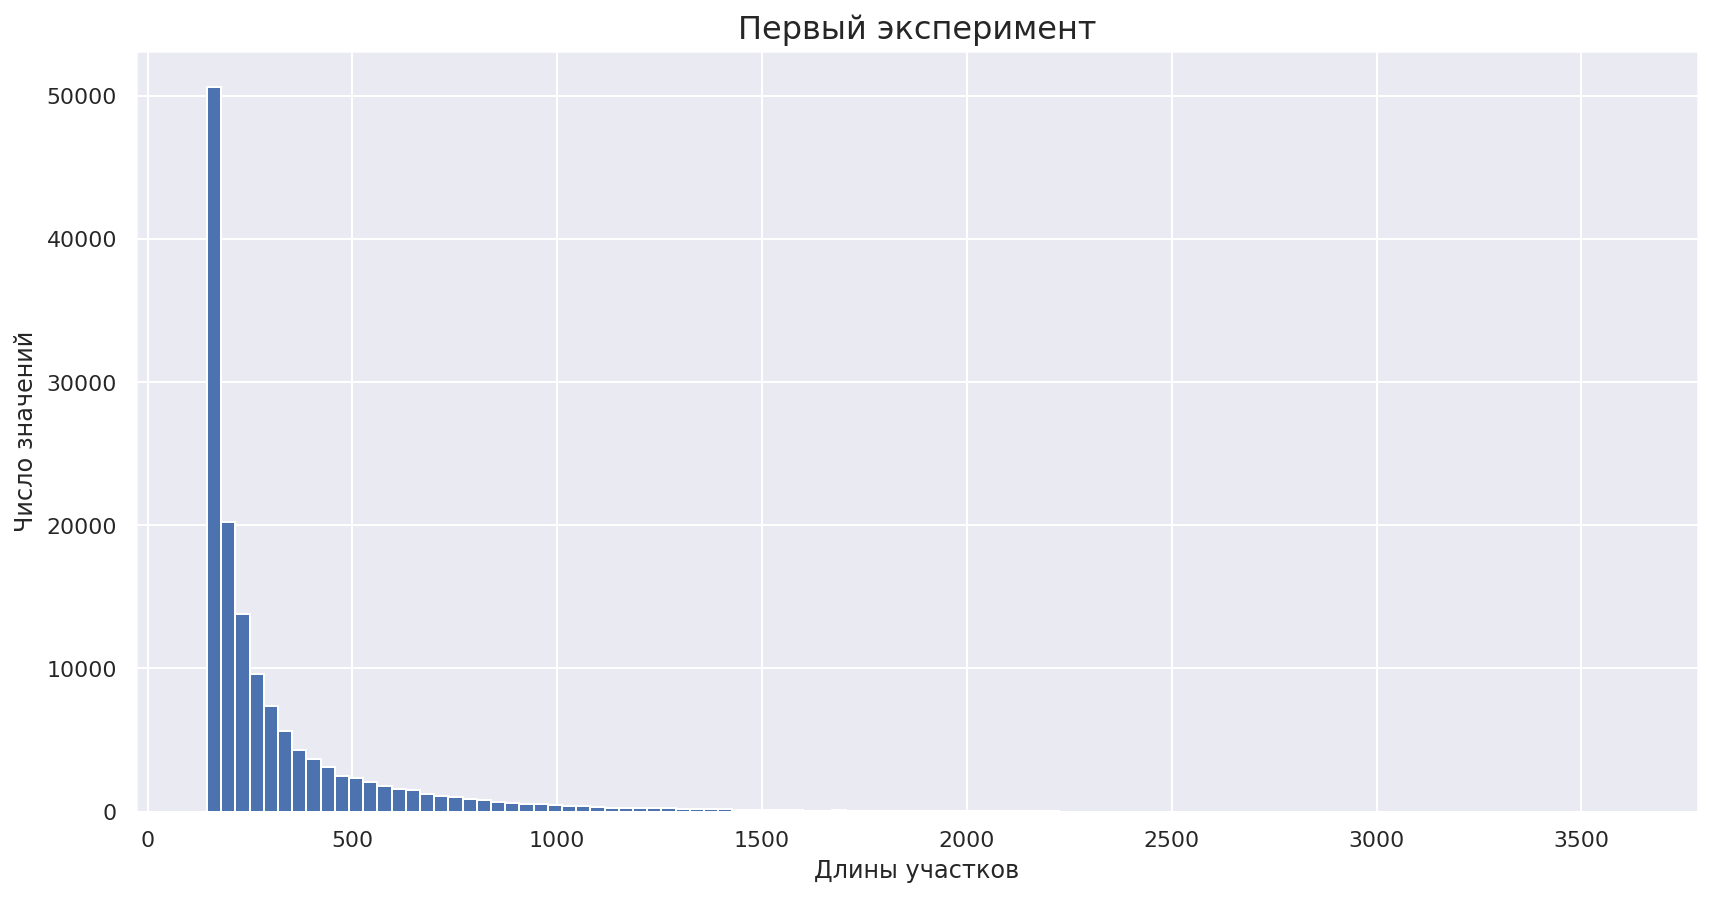

In [98]:
plt.rcParams['figure.figsize'] = 14, 7
plt.rcParams['font.size'] = 12
plt.hist(mark1['chromLen'], bins=100)
plt.title('Первый эксперимент', size=16)
plt.xlabel('Длины участков')
plt.ylabel('Число значений')
plt.show()

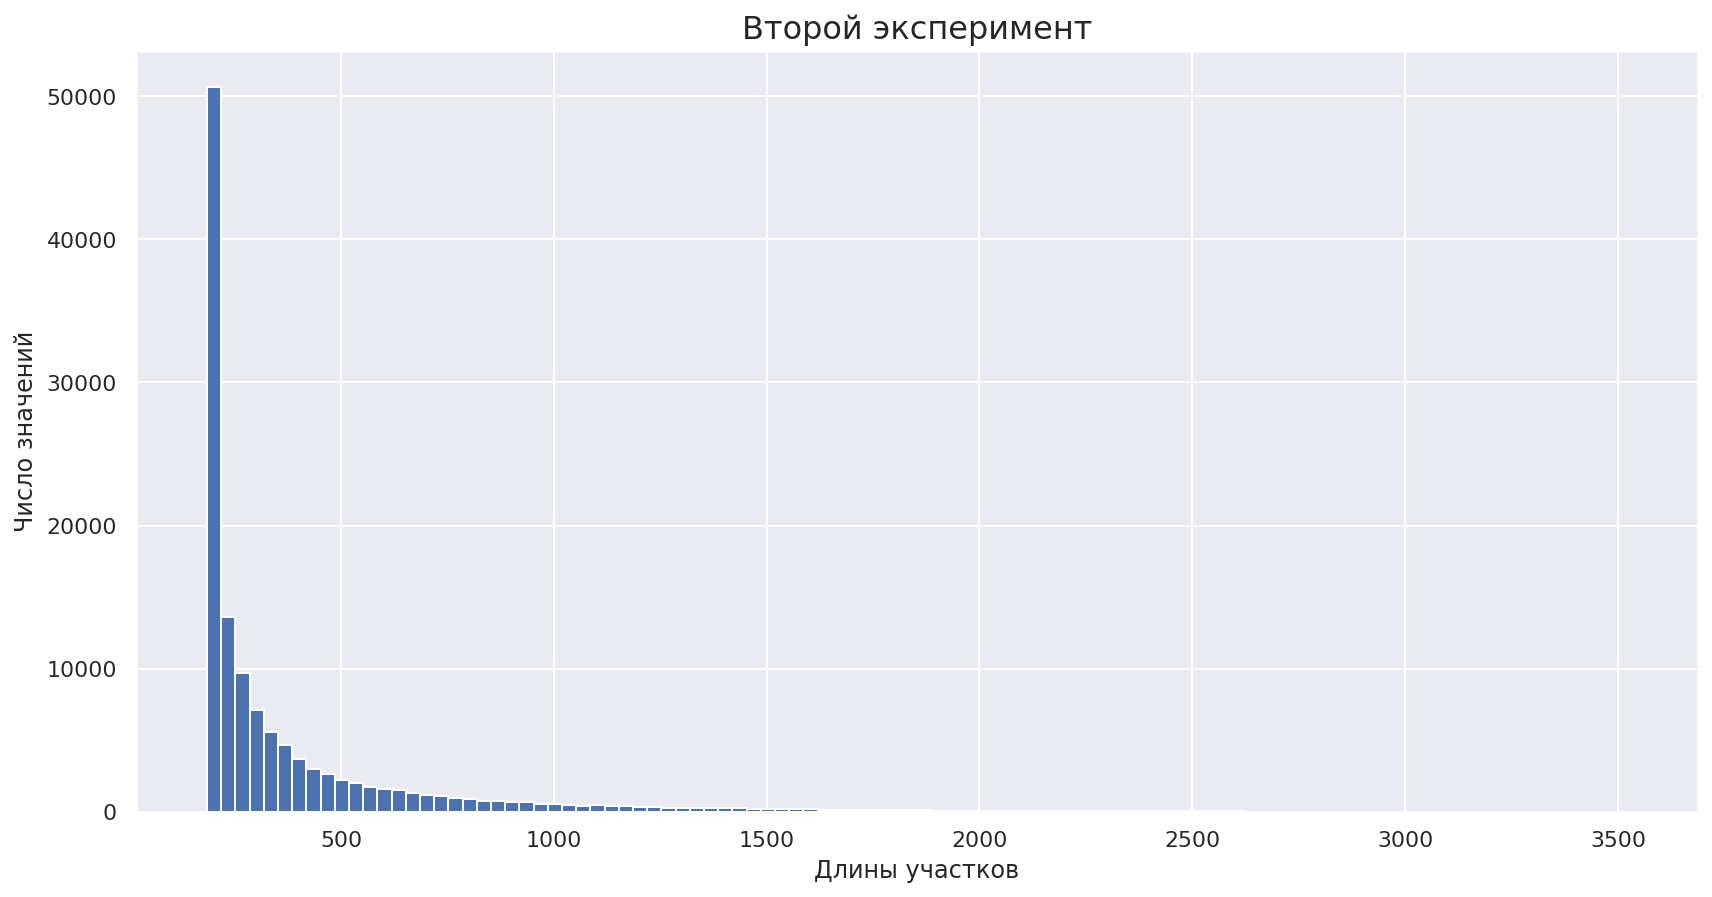

In [99]:
plt.rcParams['figure.figsize'] = 14, 7
plt.rcParams['font.size'] = 12
plt.hist(mark2['chromLen'], bins=100)
plt.title('Второй эксперимент', size=16)
plt.xlabel('Длины участков')
plt.ylabel('Число значений')
plt.show()

In [100]:
print('Количество пиков в первом эксперименте:', mark1.shape[0])

Количество пиков в первом эксперименте: 142121


In [101]:
print('Количество пиков во втором эксперименте:', mark2.shape[0])

Количество пиков во втором эксперименте: 125410


Как видно из гистограмм, с ростом длин пиков снижается их количество. Например, пиков длины > 1500 достаточно мало. Посчитаем, сколько их:

In [102]:
mark1[mark1['chromLen'] > 1500].shape[0]

1004

In [103]:
mark2[mark2['chromLen'] > 1500].shape[0]

2109

Относительно количества всех пиков, пиков длины > 1500 мало, поэтому смело выкинем их:

In [104]:
mark1.drop(mark1[mark1['chromLen'] > 1500].index, inplace=True)

In [105]:
mark2.drop(mark2[mark2['chromLen'] > 1500].index, inplace=True)

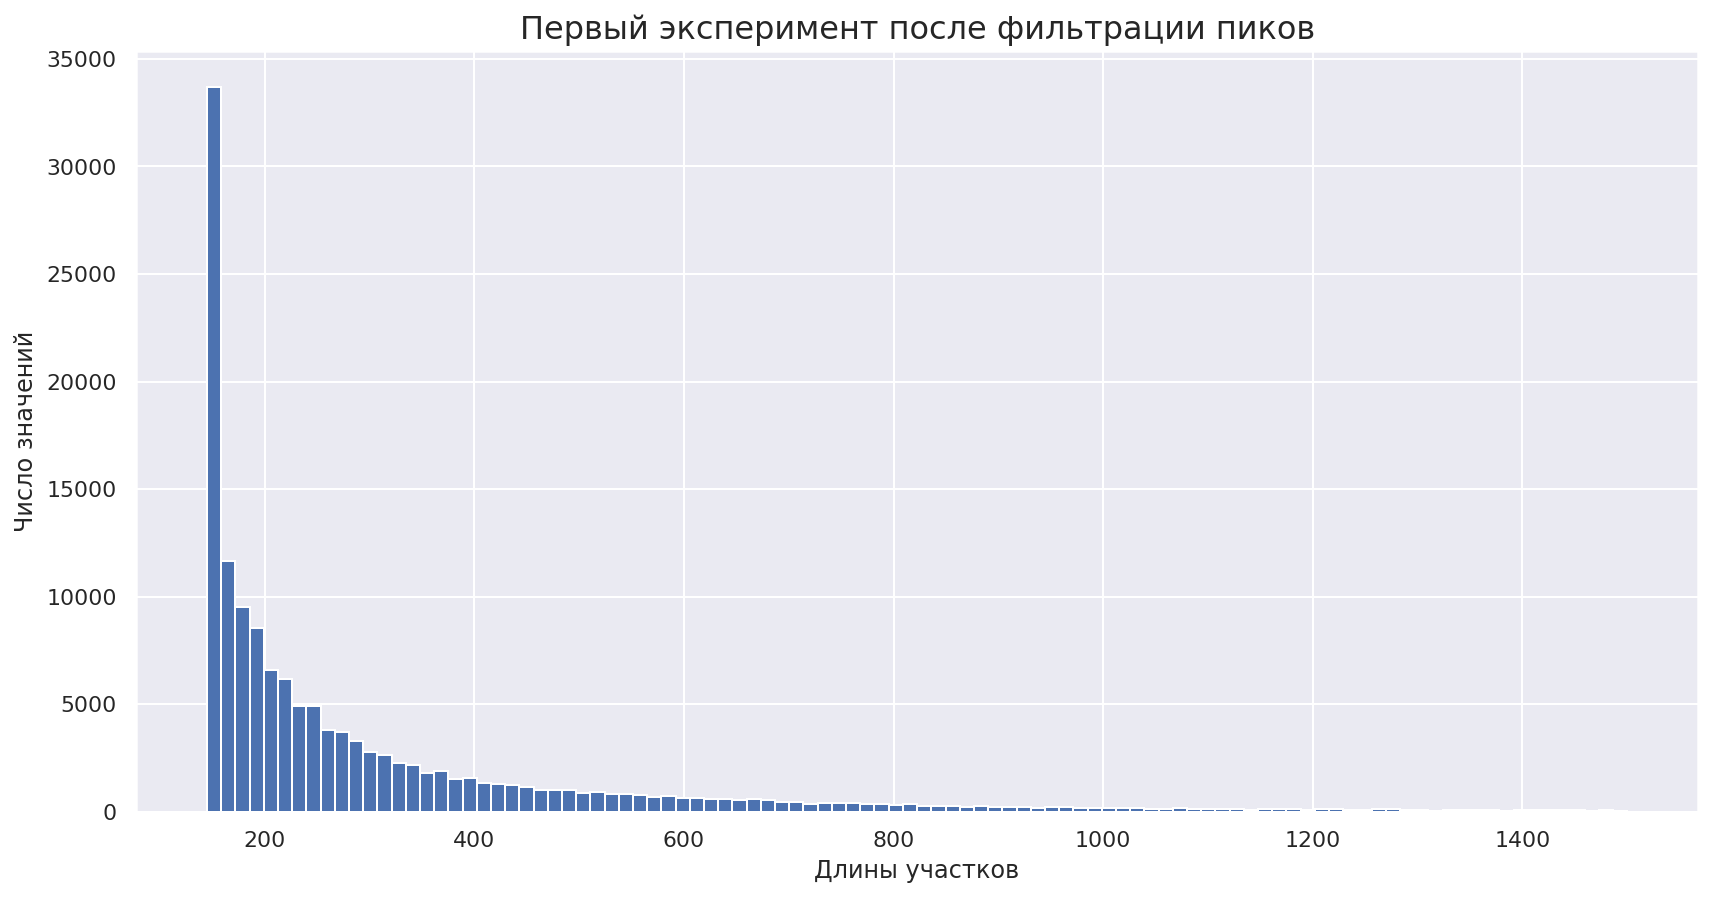

In [106]:
plt.rcParams['figure.figsize'] = 14, 7
plt.rcParams['font.size'] = 12
plt.hist(mark1['chromLen'], bins=100)
plt.title('Первый эксперимент после фильтрации пиков', size=16)
plt.xlabel('Длины участков')
plt.ylabel('Число значений')
plt.show()

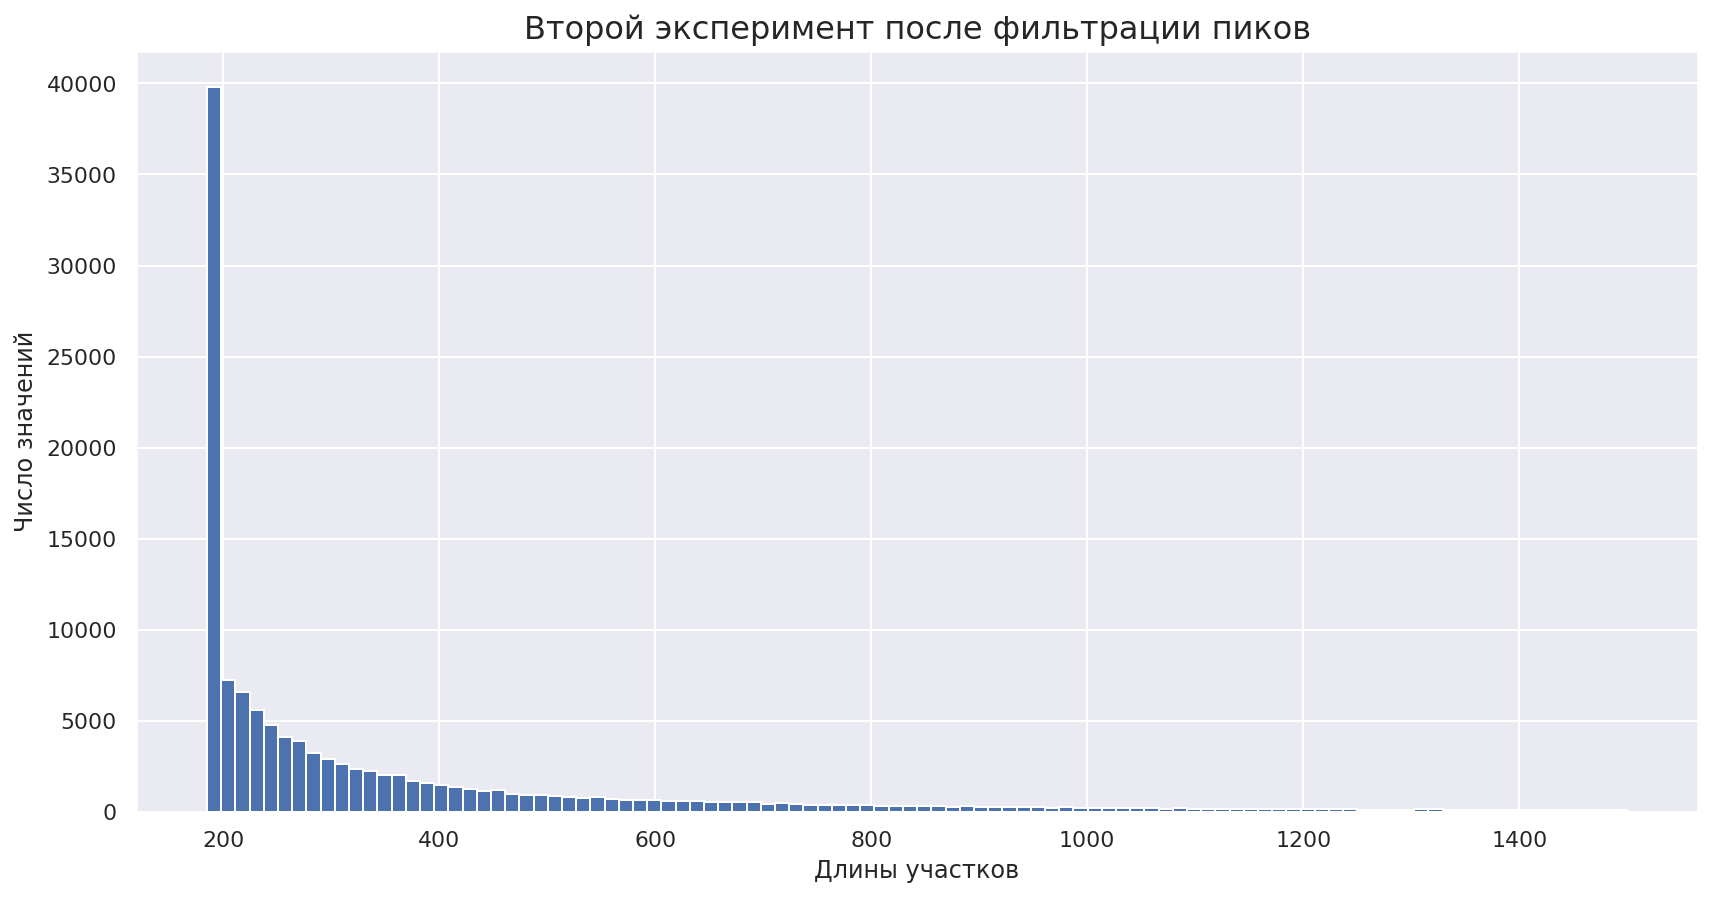

In [107]:
plt.rcParams['figure.figsize'] = 14, 7
plt.rcParams['font.size'] = 12
plt.hist(mark2['chromLen'], bins=100)
plt.title('Второй эксперимент после фильтрации пиков', size=16)
plt.xlabel('Длины участков')
plt.ylabel('Число значений')
plt.show()

In [108]:
print('Количество пиков в первом эксперименте после фильтрации:', mark1.shape[0])

Количество пиков в первом эксперименте после фильтрации: 141117


In [109]:
print('Количество пиков во втором эксперименте после фильтрации:', mark2.shape[0])

Количество пиков во втором эксперименте после фильтрации: 123301


In [110]:
mark1.drop(['chromLen'], axis=1).to_csv('ENCFF271JBK_filtered.bed', index=False, sep='\t', header=None)
mark2.drop(['chromLen'], axis=1).to_csv('ENCFF534KJU_filtered.bed', index=False, sep='\t', header=None)

Для поиска пересечений пиков и аннотированных генов нам потребуется bedtools.

In [111]:
! apt-get install bedtools

Reading package lists... Done
Building dependency tree       
Reading state information... Done
bedtools is already the newest version (2.26.0+dfsg-5).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


Из репозитория скачиваем аннотированные гены, добытые из UCSC:

In [112]:
! wget https://github.com/netwasted/hse21_H2AFZ_ZDNA_human/raw/main/data/annotated_genes/3exons.bed
! wget https://github.com/netwasted/hse21_H2AFZ_ZDNA_human/raw/main/data/annotated_genes/5exons.bed
! wget https://github.com/netwasted/hse21_H2AFZ_ZDNA_human/raw/main/data/annotated_genes/codingexones.bed
! wget https://github.com/netwasted/hse21_H2AFZ_ZDNA_human/raw/main/data/annotated_genes/downstream300.bed
! wget https://github.com/netwasted/hse21_H2AFZ_ZDNA_human/raw/main/data/annotated_genes/intronsplus.bed
! wget https://github.com/netwasted/hse21_H2AFZ_ZDNA_human/raw/main/data/annotated_genes/promoter1000.bed

--2021-11-07 07:31:52--  https://github.com/netwasted/hse21_H2AFZ_ZDNA_human/raw/main/data/annotated_genes/3exons.bed
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/netwasted/hse21_H2AFZ_ZDNA_human/main/data/annotated_genes/3exons.bed [following]
--2021-11-07 07:31:52--  https://raw.githubusercontent.com/netwasted/hse21_H2AFZ_ZDNA_human/main/data/annotated_genes/3exons.bed
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 265 [text/plain]
Saving to: ‘3exons.bed.1’

3exons.bed.1        100%[===================>]     265  --.-KB/s    in 0s      

2021-11-07 07:31:53 (10.0 MB/s) - ‘3exons.bed.1’ sav

In [113]:
! cat ENCFF271JBK_filtered.bed ENCFF534KJU_filtered.bed | sort -k1,1 -k2,2n | bedtools merge > H2AFZ_brain.merge.hg19.bed

### Анализ участков вторичной структуры ДНК

In [114]:
!wget https://github.com/netwasted/hse21_H2AFZ_ZDNA_human/raw/main/data/DeepZ.bed

--2021-11-07 07:31:55--  https://github.com/netwasted/hse21_H2AFZ_ZDNA_human/raw/main/data/DeepZ.bed
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/netwasted/hse21_H2AFZ_ZDNA_human/main/data/DeepZ.bed [following]
--2021-11-07 07:31:55--  https://raw.githubusercontent.com/netwasted/hse21_H2AFZ_ZDNA_human/main/data/DeepZ.bed
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 461744 (451K) [text/plain]
Saving to: ‘DeepZ.bed.1’

DeepZ.bed.1         100%[===================>] 450.92K  --.-KB/s    in 0.005s  

2021-11-07 07:31:55 (88.7 MB/s) - ‘DeepZ.bed.1’ saved [461744/461744]



In [115]:
dna = pd.read_csv('DeepZ.bed', sep='\t', header=None)
header = ['chrom', 'chromStart', 'chromEnd']
dna.columns = header[:len(dna.columns)]

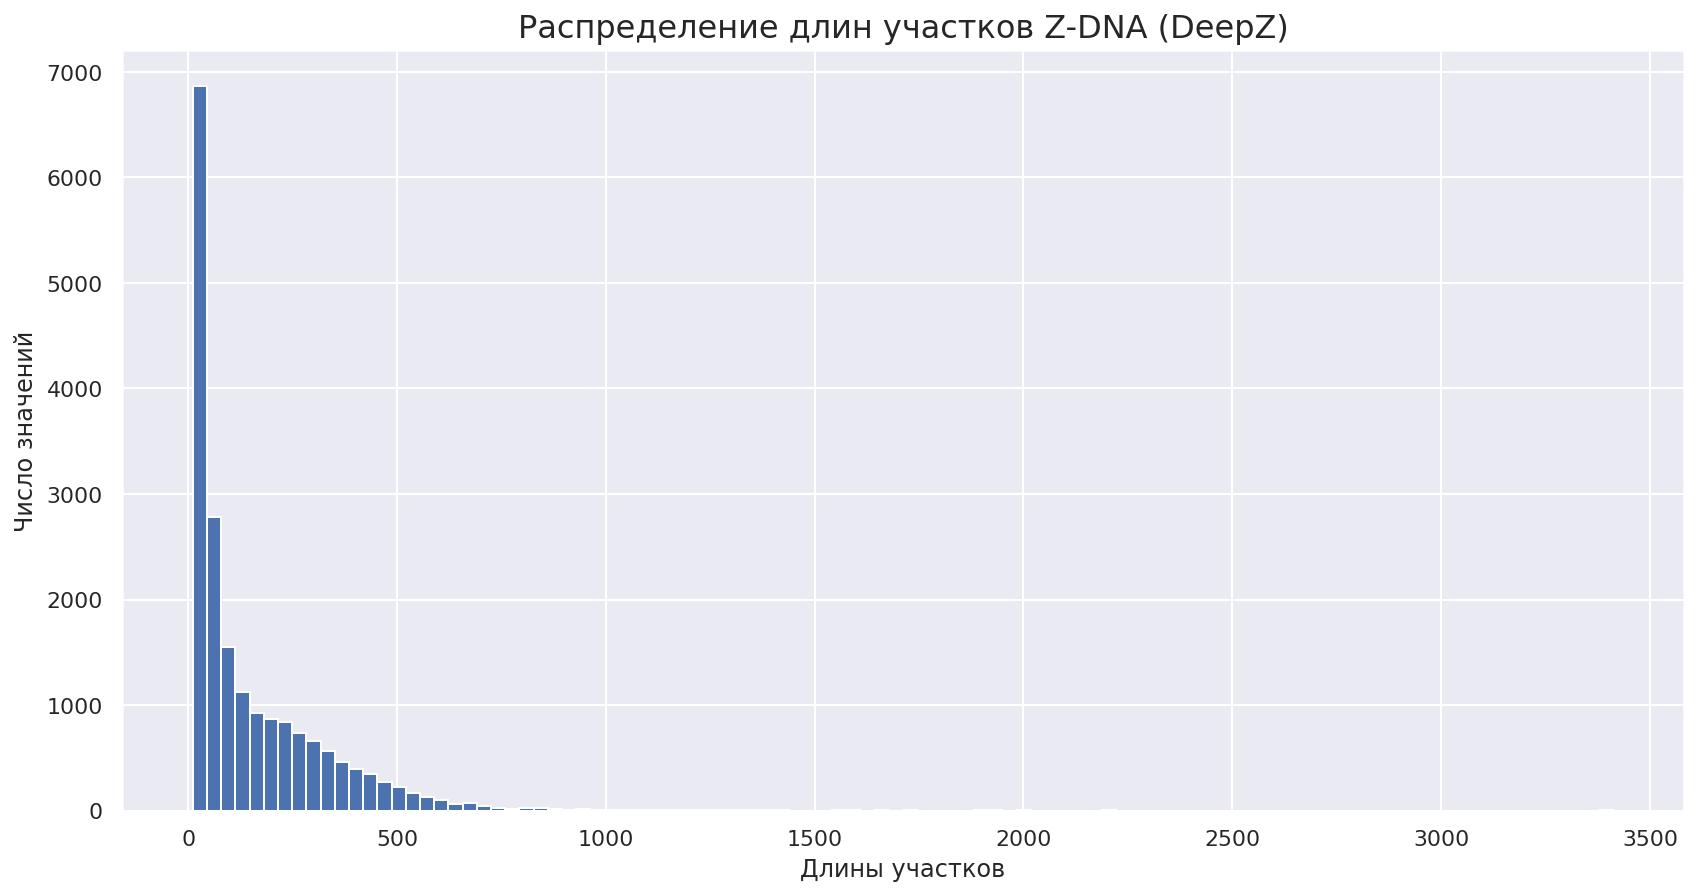

In [116]:
plt.rcParams['figure.figsize'] = 14, 7
plt.rcParams['font.size'] = 12
plt.hist(dna['chromEnd'] - dna['chromStart'], bins=100)
plt.title('Распределение длин участков Z-DNA (DeepZ)', size=16)
plt.xlabel('Длины участков')
plt.ylabel('Число значений')
plt.show()

In [117]:
print('Количество пиков во вторичной структуре ДНК:', dna.shape[0])

Количество пиков во вторичной структуре ДНК: 19394


### Анализ пересечений гистоновой метки и структуры ДНК

In [118]:
!bedtools intersect -a DeepZ.bed -b H2AFZ_brain.merge.hg19.bed > H2AFZ_brain.intersect_with_DeepZ.bed

In [119]:
inter = pd.read_csv('H2AFZ_brain.intersect_with_DeepZ.bed', sep='\t', header=None)
header = ['chrom', 'chromStart', 'chromEnd']
inter.columns = header[:len(inter.columns)]

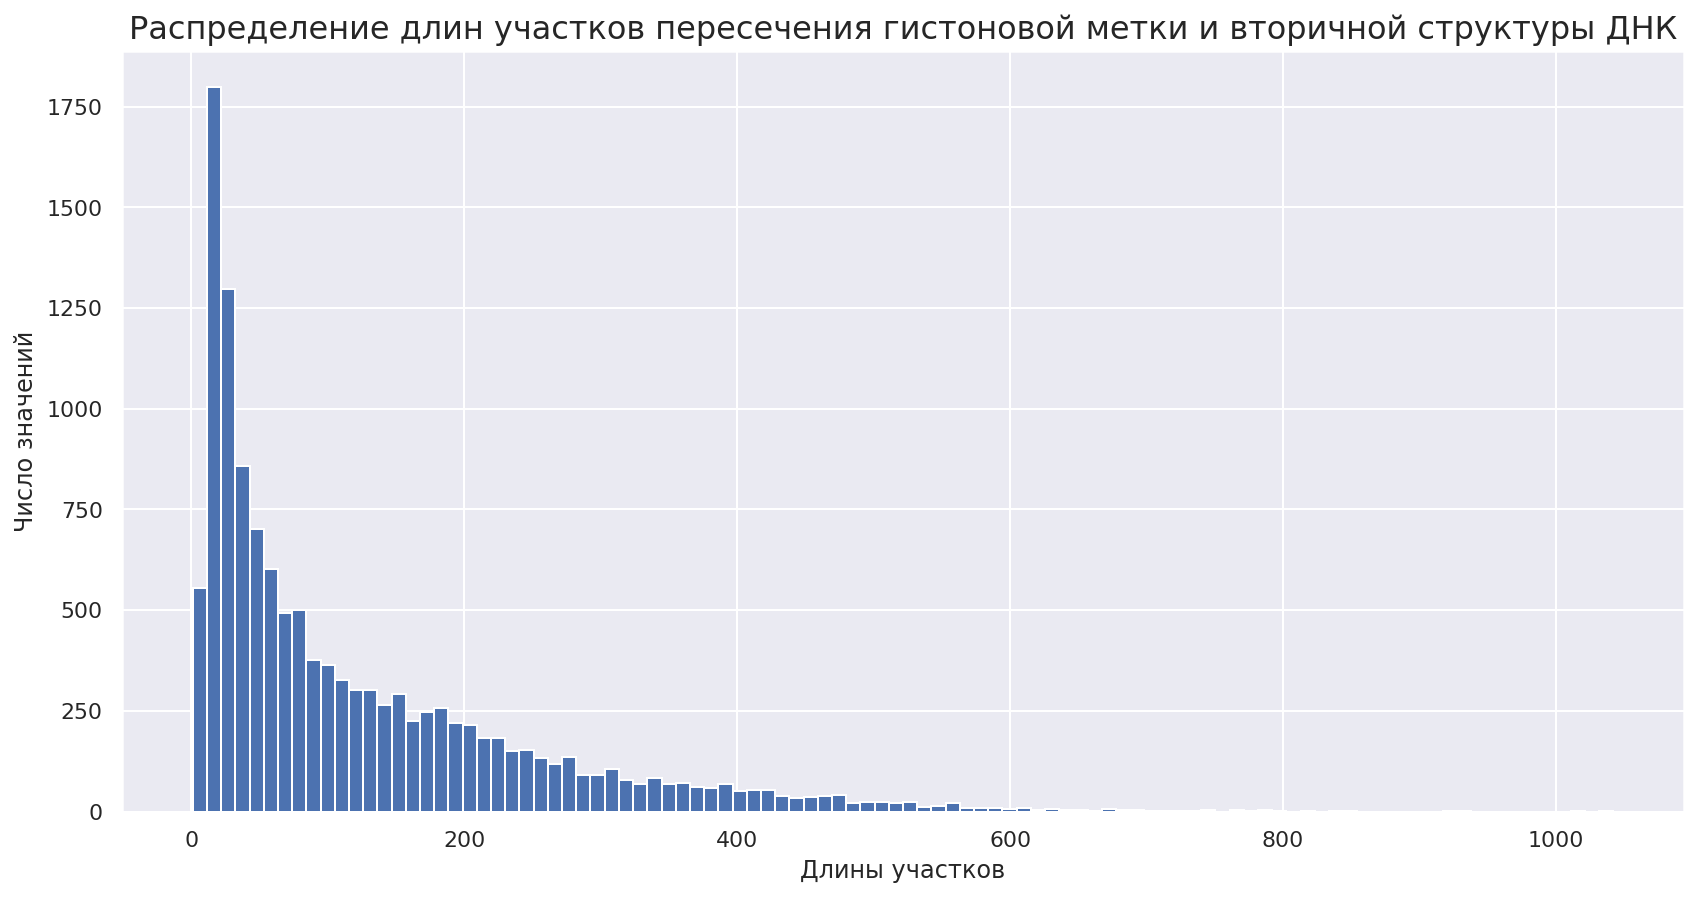

In [120]:
plt.rcParams['figure.figsize'] = 14, 7
plt.rcParams['font.size'] = 12
plt.hist(inter['chromEnd'] - inter['chromStart'], bins=100)
plt.title('Распределение длин участков пересечения гистоновой метки и вторичной структуры ДНК', size=16)
plt.xlabel('Длины участков')
plt.ylabel('Число значений')
plt.show()

In [121]:
print('Количество участков в пересечении:', inter.shape[0])

Количество участков в пересечении: 12706


In [122]:
!wget https://github.com/netwasted/hse21_H2AFZ_ZDNA_human/raw/main/data/H2AFZ_brain.intersect_with_DeepZ.genes_uniq.txt

--2021-11-07 07:31:57--  https://github.com/netwasted/hse21_H2AFZ_ZDNA_human/raw/main/data/H2AFZ_brain.intersect_with_DeepZ.genes_uniq.txt
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/netwasted/hse21_H2AFZ_ZDNA_human/main/data/H2AFZ_brain.intersect_with_DeepZ.genes_uniq.txt [following]
--2021-11-07 07:31:57--  https://raw.githubusercontent.com/netwasted/hse21_H2AFZ_ZDNA_human/main/data/H2AFZ_brain.intersect_with_DeepZ.genes_uniq.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46010 (45K) [text/plain]
Saving to: ‘H2AFZ_brain.intersect_with_DeepZ.genes_uniq.txt.1’

H2AFZ_brain.interse 100%[

In [123]:
!wget https://github.com/netwasted/hse21_H2AFZ_ZDNA_human/raw/main/data/H2AFZ_brain.intersect_with_DeepZ.genes.txt

--2021-11-07 07:31:57--  https://github.com/netwasted/hse21_H2AFZ_ZDNA_human/raw/main/data/H2AFZ_brain.intersect_with_DeepZ.genes.txt
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/netwasted/hse21_H2AFZ_ZDNA_human/main/data/H2AFZ_brain.intersect_with_DeepZ.genes.txt [following]
--2021-11-07 07:31:57--  https://raw.githubusercontent.com/netwasted/hse21_H2AFZ_ZDNA_human/main/data/H2AFZ_brain.intersect_with_DeepZ.genes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 898831 (878K) [text/plain]
Saving to: ‘H2AFZ_brain.intersect_with_DeepZ.genes.txt.1’

H2AFZ_brain.interse 100%[==================

In [124]:
genes = pd.read_csv('H2AFZ_brain.intersect_with_DeepZ.genes.txt', sep='\t')

In [125]:
len(set(genes['peak'].values))

8232

Следовательно, количество пиков, ассоциированных с генами, равно 8232.

In [126]:
uniq = pd.read_csv('H2AFZ_brain.intersect_with_DeepZ.genes_uniq.txt', header=None)

In [127]:
uniq.shape[0]

6025

Значит, общее количество уникальных генов: 6025.